In [36]:
# Import Necessary Libraries
from telethon import TelegramClient
from telethon.errors import SessionPasswordNeededError
from telethon.tl.functions.messages import GetHistoryRequest
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
import re
from collections import Counter

In [38]:
# Set Telegram API Credentials
api_id = '28626741'
api_hash = 'bccf833966cbe42d21d420fd3c3d6457'
phone = '+251936679199'  

# Initialize Telegram Client
client = TelegramClient('session_name', api_id, api_hash)

In [39]:
# Define Function to Connect to Telegram
async def connect_to_telegram():
    """Connects to Telegram and handles authentication."""
    await client.start(phone)
    print("Connected to Telegram!")
    
    # Check if user is authorized
    if not await client.is_user_authorized():
        try:
            await client.send_code_request(phone)
            code = input("Enter the code sent to your Telegram: ")
            await client.sign_in(phone, code)
        except SessionPasswordNeededError:
            password = input("Enter your password: ")
            await client.sign_in(password=password)


In [40]:
# Connect to Telegram
await connect_to_telegram()


Connected to Telegram!


In [41]:
async def fetch_messages(channel_username, limit=100):
    """Fetches messages from a Telegram channel."""
    try:
        channel = await client.get_entity(channel_username)
        history = await client(GetHistoryRequest(
            peer=channel,
            offset_id=0,
            offset_date=None,
            add_offset=0,
            limit=limit,
            max_id=0,
            min_id=0,
            hash=0
        ))
        return history.messages
    except Exception as e:
        print(f"Error fetching messages: {e}")
        return []

In [42]:
async def list_channels():
    """Lists all channels the user is a part of."""
    dialogs = await client.get_dialogs()
    channels = [dialog for dialog in dialogs if dialog.is_channel]
    for channel in channels:
        print(f"Channel Name: {channel.name}, Username: @{channel.entity.username}")

await list_channels()


Channel Name: Zabbix, Username: @None
Channel Name: Fullstack web developers, Username: @reactjs2020
Channel Name: AudioBook Collection • Audiobooks Archive • Ebooks, Username: @Audiobooks_collection
Channel Name: Bridal Team only, Username: @None
Channel Name: RUHAMAH🔥, Username: @ruhamahfam
Channel Name: USED PHONE SELLER™ 🇪🇹, Username: @usedphoneselleres
Channel Name: Child Dev't Network, Username: @childdevtnetwork
Channel Name: TIKVAH-ETHIOPIA, Username: @tikvahethiopia
Channel Name: TV Series Bot 📺, Username: @Netflix_Xseriesbot
Channel Name: DINOPUTIH | #VIRAL, Username: @LYDIA_ONIC_VIRAL_xu
Channel Name: Khalid chiffon, Username: @None
Channel Name: TIKVAH-MAGAZINE, Username: @tikvahethmagazine
Channel Name: Google Facts™ [ ️@googlefactss🌎], Username: @googlefactss
Channel Name: TIKVAH-CART, Username: @tikvahethcart
Channel Name: Afriwork (Freelance Ethiopia), Username: @freelance_ethio
Channel Name: شرکت افزایش سرمایه گذاری خوارزمی ♻️توسعه صنعتی♻️ 🔷️[ سهامی عام ]🔷️, Username: 

In [43]:
channels = ['@googlefactss', '@Audiobooks_collection', '@reactjs2020']
all_messages = []
for channel in channels:
    messages = await fetch_messages(channel, limit=500)
    all_messages.extend(messages)

In [44]:
all_messages = []
for channel in channels:
    messages = await fetch_messages(channel, limit=500)
    all_messages.extend(messages)


In [45]:
# Process and Clean Messages
def process_messages(messages):
    """Processes and cleans messages."""
    data = []
    for msg in messages:
        if msg.message:  # Check if the message contains text
            data.append({
                'sender': msg.from_id.user_id if msg.from_id else None,
                'date': msg.date,
                'text': msg.message
            })
    return pd.DataFrame(data)

In [46]:
# Convert Messages to DataFrame
df = process_messages(all_messages)

In [47]:
def clean_text(text):
    """Cleans text data: removes special characters, links, and tokenizes."""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^ሀ-፡a-zA-Z0-9]", " ", text)  # Keep Amharic and English characters
    text = text.lower()
    return text

In [48]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [49]:
df.to_csv('telegram_messages.csv', index=False)
print("Preprocessed data saved to 'telegram_messages.csv'.")

Preprocessed data saved to 'telegram_messages.csv'.


In [50]:
# Exploratory Data Analysis (EDA)
# Word Frequency Analysis
from collections import Counter

In [51]:
from telethon.errors.rpcerrorlist import ServerError

async def safe_connect():
    retries = 3
    while retries > 0:
        try:
            await client.connect()
            if await client.is_user_authorized():
                print("Connected to Telegram!")
                break
        except ServerError as e:
            print(f"Connection failed: {e}. Retrying...")
            retries -= 1
            await asyncio.sleep(5)
    if retries == 0:
        print("Failed to connect after multiple attempts.")




In [52]:
print(df.head())

   sender                      date  \
0     NaN 2025-01-20 19:17:32+00:00   
1     NaN 2025-01-20 14:02:29+00:00   
2     NaN 2025-01-20 10:59:56+00:00   
3     NaN 2025-01-20 07:35:12+00:00   
4     NaN 2025-01-19 17:07:13+00:00   

                                                text  \
0  Australia is the only continent without any gl...   
1  If a Catholic priest reveals anything someone ...   
2  The word breakfast comes from the Middle Engli...   
3  The word “honeymoon” originated from the tradi...   
4  There is a positive correlation between vitami...   

                                        cleaned_text  
0  australia is the only continent without any gl...  
1  if a catholic priest reveals anything someone ...  
2  the word breakfast comes from the middle engli...  
3  the word  honeymoon  originated from the tradi...  
4  there is a positive correlation between vitami...  


In [55]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Download if needed: python -m spacy download en_core_web_sm
doc = nlp("This is a test sentence for tokenization.")
tokens = [token.text for token in doc]
print(tokens)


['This', 'is', 'a', 'test', 'sentence', 'for', 'tokenization', '.']


In [59]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")
print(df['cleaned_text'].head())  # Inspect the cleaned text

0    australia is the only continent without any gl...
1    if a catholic priest reveals anything someone ...
2    the word breakfast comes from the middle engli...
3    the word  honeymoon  originated from the tradi...
4    there is a positive correlation between vitami...
Name: cleaned_text, dtype: object


In [60]:
# Example DataFrame (Replace this with your fetched data)
data = [
    {"sender": 1, "date": "2025-01-20", "text": "Australia is the only continent without any glaciers."},
    {"sender": 2, "date": "2025-01-19", "text": "The word breakfast comes from the Middle English word 'brekenfast'."},
    {"sender": 3, "date": "2025-01-18", "text": "If a Catholic priest reveals anything someone confessed, he is excommunicated."}
]
df = pd.DataFrame(data)

In [61]:

# Clean Text Data
def clean_text(text):
    """Clean text by removing special characters, links, and normalizing."""
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)  # Retain only alphanumeric and spaces
    text = text.lower().strip()  # Lowercase and strip whitespace
    return text

df['cleaned_text'] = df['text'].apply(clean_text)


In [62]:
def spacy_tokenize(text):
    """Tokenize text using spaCy."""
    doc = nlp(text)
    return [token.text for token in doc]

df['tokens'] = df['cleaned_text'].apply(spacy_tokenize)


In [63]:
# Save Preprocessed Data
df.to_csv('telegram_messages.csv', index=False)
print("Preprocessed data saved to 'telegram_messages.csv'.")

Preprocessed data saved to 'telegram_messages.csv'.


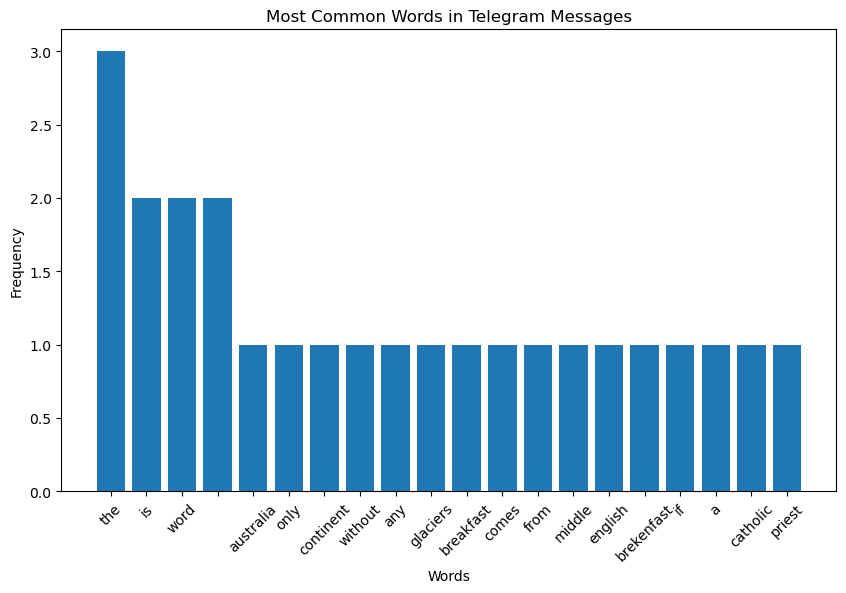

In [65]:
# --- Visualization 1: Word Frequency ---
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)  # Top 20 most frequent words
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Most Common Words in Telegram Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

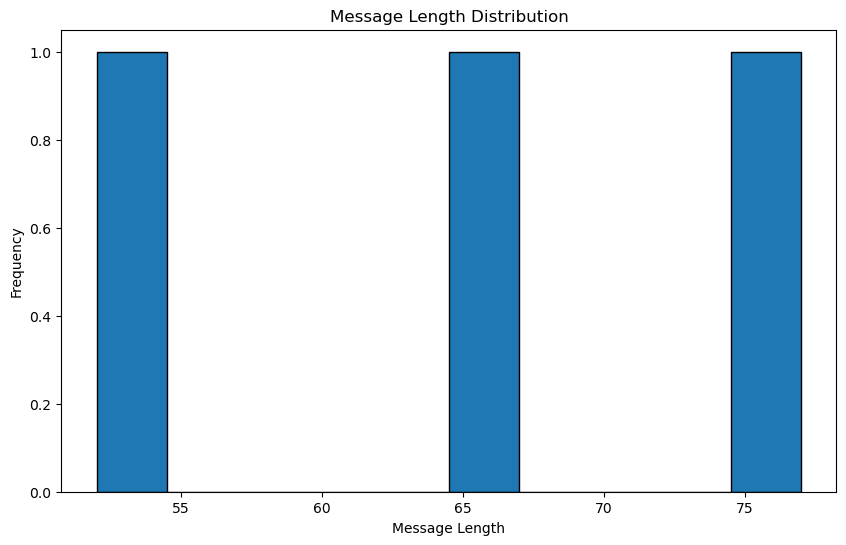

In [66]:
# --- Visualization 2: Message Length Distribution ---
df['message_length'] = df['cleaned_text'].apply(len)  # Calculate message lengths
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=10, edgecolor='black')
plt.title("Message Length Distribution")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

In [67]:
unique_tokens = list(word_freq.keys())  # Get the unique tokens
print("Unique tokens:", unique_tokens)


Unique tokens: ['australia', 'is', 'the', 'only', 'continent', 'without', 'any', 'glaciers', 'word', 'breakfast', 'comes', 'from', 'middle', 'english', ' ', 'brekenfast', 'if', 'a', 'catholic', 'priest', 'reveals', 'anything', 'someone', 'confessed', 'he', 'excommunicated']


In [68]:
print("Unique tokens with their counts:")
for token, count in word_freq.items():
    print(f"{token}: {count}")


Unique tokens with their counts:
australia: 1
is: 2
the: 3
only: 1
continent: 1
without: 1
any: 1
glaciers: 1
word: 2
breakfast: 1
comes: 1
from: 1
middle: 1
english: 1
 : 2
brekenfast: 1
if: 1
a: 1
catholic: 1
priest: 1
reveals: 1
anything: 1
someone: 1
confessed: 1
he: 1
excommunicated: 1


Cannot get difference since the account is likely misusing the session: database is locked
Unhandled exception from keepalive_handle after cancelling <class '_asyncio.Task'> (<Task finished name='Task-136' coro=<UpdateMethods._keepalive_loop() done, defined at /opt/anaconda3/lib/python3.12/site-packages/telethon/client/updates.py:481> exception=OperationalError('database is locked')>)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/telethon/helpers.py", line 176, in _cancel
    await task
  File "/opt/anaconda3/lib/python3.12/site-packages/telethon/client/updates.py", line 517, in _keepalive_loop
    self._save_states_and_entities()
  File "/opt/anaconda3/lib/python3.12/site-packages/telethon/client/telegrambaseclient.py", line 693, in _save_states_and_entities
    self.session.process_entities(types.contacts.ResolvedPeer(None, [e._as_input_peer() for e in entities], []))
  File "/opt/anaconda3/lib/python3.12/site-packages/telethon/sessions/sqlite